<a href="https://colab.research.google.com/github/JerryLiu789/Tableware_Classification_Project/blob/main/Tableware_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 掛接 Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# 環境建置

In [ ]:
import os

dataset_path = "/content/YoloDataset"

# 創建 YOLO 資料夾
os.makedirs(f"{dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/train", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/val", exist_ok=True)

print("✅ YoloDataset 資料夾已建立！")


In [ ]:
yaml_content = """train: /content/YoloDataset/images/train/
val: /content/YoloDataset/images/val/

nc: 7  # 類別數量
names: ["Fork", "Cup", "Spoon", "Chopsticks", "Bowl", "Plate", "knife"]  # 類別名稱
"""

with open(f"{dataset_path}/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml 已建立！")


In [ ]:
!cp -r /content/YoloDataset /content/drive/MyDrive/Tableware_Classification_Project/
print("✅ YoloDataset 已上傳到 Google Drive！")



# 載入必要檔案

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!cp -r /content/drive/MyDrive/Tableware_Classification_Project/YoloDataset /content/


# 訓練模型

## 利用五分之一的資料進行訓練，幫助後續 auto labeling 剩下的圖片素材

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # 使用 YOLO11 Nano 預訓練模型

# 開始訓練
model.train(
    data="/content/YoloDataset/data.yaml",  # 資料集
    epochs=50,  # 訓練 50 個 epoch
    imgsz=640,  # 設定圖片大小
    batch=32,  # 設定 batch size (原設訂16)
    device="cuda"  # 使用 GPU 訓練
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 62.1MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/YoloDataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YoloDataset/labels/train... 558 images, 0 backgrounds, 1 corrupt:  54%|█████▍    | 559/1030 [00:00<00:00, 1039.95it/s]/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
train: Scanning /content/YoloDataset/labels/train... 1029 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1030/1030 [00:01<00:00, 906.91it/s]

train: WARNING ⚠️ /content/YoloDataset/images/train/fork_0165.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'heic', 'tiff', 'dng', 'png', 'webp', 'mpo', 'jpg', 'jpeg', 'pfm', 'bmp', 'tif'}
videos: {'mpg', 'gif', 'mpeg', 'webm', 'm4v', 'ts', 'asf', 'mkv', 'mov', 'mp4', 'wmv', 'avi'}
train: WARNING ⚠️ /content/YoloDataset/images/train/plate_0073.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/plate_0083.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/plate_0100.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/plate_0104.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/plate_0125.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/spoon_0027.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/spoon_0043.jpg: co

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/YoloDataset/labels/val... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<00:00, 602.52it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: New cache created: /content/YoloDataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.13G      1.407      3.477      1.637         24        640: 100%|██████████| 33/33 [00:06<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        175        357     0.0169      0.913      0.235      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.11G       1.33      2.741      1.551         28        640: 100%|██████████| 33/33 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        175        357      0.611     0.0407      0.199      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.09G      1.387      2.427      1.589         17        640: 100%|██████████| 33/33 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        175        357      0.196       0.27      0.197     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.1G      1.355       2.24      1.555         20        640: 100%|██████████| 33/33 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        175        357      0.188      0.319      0.179      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.09G      1.367      2.182      1.546         15        640: 100%|██████████| 33/33 [00:05<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        175        357      0.449       0.37      0.326       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.86G      1.322      2.006      1.509         35        640: 100%|██████████| 33/33 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        175        357       0.59      0.407      0.412      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.1G      1.291      1.943      1.507         29        640: 100%|██████████| 33/33 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        175        357      0.396      0.322      0.341      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.11G      1.291      1.871      1.493         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


                   all        175        357      0.493      0.494      0.481      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.09G      1.258      1.751      1.458         16        640: 100%|██████████| 33/33 [00:05<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        175        357      0.521      0.503      0.493      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.17G      1.271       1.77      1.469         21        640: 100%|██████████| 33/33 [00:05<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        175        357      0.558      0.552      0.572      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.11G      1.241      1.719      1.446         24        640: 100%|██████████| 33/33 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all        175        357      0.573      0.513      0.549      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.1G       1.23       1.65      1.429         21        640: 100%|██████████| 33/33 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        175        357      0.589      0.542      0.558      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.09G      1.245      1.612      1.452         21        640: 100%|██████████| 33/33 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


                   all        175        357      0.702      0.485      0.608      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.14G      1.202      1.559      1.397         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]


                   all        175        357       0.51      0.559      0.542      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.11G      1.195      1.491      1.394         12        640: 100%|██████████| 33/33 [00:05<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all        175        357       0.57      0.584      0.544      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.12G      1.205      1.508      1.411         18        640: 100%|██████████| 33/33 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


                   all        175        357      0.593      0.556      0.569      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.1G      1.177      1.447      1.397         24        640: 100%|██████████| 33/33 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


                   all        175        357      0.518      0.468      0.464      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.13G      1.149      1.385      1.376         11        640: 100%|██████████| 33/33 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        175        357      0.613      0.564      0.611      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.15G      1.148       1.37      1.367         17        640: 100%|██████████| 33/33 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]


                   all        175        357       0.68      0.592      0.657       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.13G      1.122      1.333       1.36         21        640: 100%|██████████| 33/33 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]


                   all        175        357      0.698      0.592      0.649      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.13G      1.136      1.325      1.355         28        640: 100%|██████████| 33/33 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        175        357      0.616      0.621      0.623       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       5.1G      1.129      1.285      1.352         15        640: 100%|██████████| 33/33 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]


                   all        175        357      0.715      0.567      0.674      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.11G      1.109      1.267      1.347         22        640: 100%|██████████| 33/33 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        175        357      0.575      0.558      0.587      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.1G      1.119      1.226      1.319         25        640: 100%|██████████| 33/33 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all        175        357      0.694      0.554      0.613      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.11G      1.099      1.237      1.338         24        640: 100%|██████████| 33/33 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


                   all        175        357       0.68      0.618      0.671      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.13G      1.107      1.217      1.331         20        640: 100%|██████████| 33/33 [00:05<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all        175        357      0.629      0.631       0.66      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.1G      1.072      1.147      1.314         19        640: 100%|██████████| 33/33 [00:05<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all        175        357      0.691      0.608      0.657       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.1G      1.075      1.149      1.309         14        640: 100%|██████████| 33/33 [00:05<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


                   all        175        357      0.676      0.608      0.654      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.11G      1.076      1.171      1.319         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all        175        357      0.645      0.659      0.698      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.1G      1.097      1.131      1.324         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all        175        357      0.612      0.607      0.633      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.11G      1.032      1.083      1.288         20        640: 100%|██████████| 33/33 [00:05<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all        175        357       0.65      0.658      0.681      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.12G      1.042       1.08      1.274         27        640: 100%|██████████| 33/33 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]


                   all        175        357      0.688      0.621      0.666      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.13G       1.03      1.065       1.29         24        640: 100%|██████████| 33/33 [00:05<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all        175        357      0.734      0.584      0.657      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.16G      1.025       1.03      1.283         22        640: 100%|██████████| 33/33 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        175        357      0.663      0.695      0.721      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.07G     0.9953      1.004      1.258         25        640: 100%|██████████| 33/33 [00:05<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        175        357      0.704      0.622      0.705      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.14G      1.011      1.009      1.263         21        640: 100%|██████████| 33/33 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


                   all        175        357      0.763      0.633      0.747      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.1G     0.9977     0.9945      1.258         20        640: 100%|██████████| 33/33 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all        175        357      0.682      0.594      0.702      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.13G     0.9726     0.9865      1.237         28        640: 100%|██████████| 33/33 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


                   all        175        357      0.742      0.606       0.72      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.13G     0.9799       0.98      1.252         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all        175        357      0.657      0.655      0.717      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.16G     0.9829     0.9664      1.256         17        640: 100%|██████████| 33/33 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        175        357      0.694      0.657      0.734      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.06G     0.9028     0.8072      1.252         12        640: 100%|██████████| 33/33 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]


                   all        175        357      0.724      0.652      0.735      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.09G     0.8679     0.7257       1.22          8        640: 100%|██████████| 33/33 [00:05<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all        175        357      0.702      0.658      0.743      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.07G     0.8475     0.6901        1.2          7        640: 100%|██████████| 33/33 [00:05<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        175        357      0.641      0.735      0.739      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.08G     0.8126     0.6808      1.182          5        640: 100%|██████████| 33/33 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all        175        357      0.795      0.655      0.754      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.06G     0.8137     0.6669      1.185         17        640: 100%|██████████| 33/33 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        175        357      0.694      0.714       0.76      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.09G     0.7958     0.6229      1.146          6        640: 100%|██████████| 33/33 [00:05<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]


                   all        175        357      0.737      0.675       0.75      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.1G     0.7747     0.6026      1.149          9        640: 100%|██████████| 33/33 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all        175        357      0.789      0.643      0.759      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.06G     0.7756      0.596      1.142         13        640: 100%|██████████| 33/33 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        175        357      0.808      0.611       0.76      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.08G     0.7514     0.5731      1.141          8        640: 100%|██████████| 33/33 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all        175        357      0.719      0.702      0.763      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.08G     0.7504     0.5845      1.139         11        640: 100%|██████████| 33/33 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all        175        357      0.736      0.685      0.764      0.542



50 epochs completed in 0.097 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]


                   all        175        357      0.717      0.702      0.763      0.544
                  Fork         26         45      0.652        0.6      0.705       0.51
                   Cup         29         57      0.733      0.722      0.747      0.516
                 Spoon         39         50      0.821       0.82      0.875       0.63
            Chopsticks         28         41      0.633      0.659      0.744      0.539
                  Bowl         20         49      0.675      0.467      0.552      0.365
                 Plate         35         68       0.68      0.721      0.774      0.555
                 knife         29         47      0.829      0.928      0.943      0.691
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9aac63cf90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

## 完成第一版完整資料的訓練模型

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # 使用 YOLO11 Nano 預訓練模型

# 開始訓練
model.train(
    data="/content/YoloDataset/data.yaml",  # 資料集
    epochs=50,  # 訓練 50 個 epoch
    imgsz=640,  # 設定圖片大小
    batch=32,  # 設定 batch size (原設訂16)
    device="cuda"  # 使用 GPU 訓練
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 187MB/s]


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/YoloDataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 43.3MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YoloDataset/labels/train... 2648 images, 29 backgrounds, 4 corrupt:  53%|█████▎    | 2650/4992 [00:02<00:02, 1105.31it/s]/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
train: Scanning /content/YoloDataset/labels/train... 4989 images, 74 backgrounds, 5 corrupt: 100%|██████████| 4992/4992 [00:04<00:00, 1050.29it/s]

train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0201.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0507.jpg: ignoring corrupt image/label: Label class 15 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0614.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0698.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0730.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0864.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0239.jpg: ignoring corrupt image/label: image file is truncated (35 bytes not processed)
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0819.jpg: corrupt JPEG restored and saved
tra

train: New cache created: /content/YoloDataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/YoloDataset/labels/val... 512 images, 0 backgrounds, 0 corrupt:  58%|█████▊    | 512/876 [00:00<00:00, 918.61it/s] /usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
val: Scanning /content/YoloDataset/labels/val... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:01<00:00, 760.52it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.77G       1.24      2.837      1.483        149        640: 100%|██████████| 156/156 [00:50<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        876       1701      0.522      0.508       0.51      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.78G      1.122      1.932      1.379        126        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        876       1701      0.602      0.547      0.576       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.87G      1.104      1.759      1.364        172        640: 100%|██████████| 156/156 [00:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701      0.522      0.533      0.517      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.84G      1.122      1.673      1.373        113        640: 100%|██████████| 156/156 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]

                   all        876       1701      0.636      0.538      0.585      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.89G      1.073      1.548      1.345        164        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701       0.59      0.594      0.607      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.77G      1.054      1.473       1.33        150        640: 100%|██████████| 156/156 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        876       1701       0.69       0.62      0.701      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.74G      1.026      1.405      1.311        136        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        876       1701      0.639      0.658      0.705       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.75G      1.012      1.347      1.294        117        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]

                   all        876       1701      0.683      0.684      0.716      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.74G     0.9811      1.305      1.279        126        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.78it/s]

                   all        876       1701       0.66      0.663      0.702      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.95G     0.9732      1.274      1.264        160        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.67it/s]

                   all        876       1701      0.711      0.685      0.757      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.88G     0.9603      1.258      1.267        128        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        876       1701      0.697      0.689      0.743      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.85G     0.9493      1.225      1.258        141        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]

                   all        876       1701       0.71      0.693      0.746      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.88G      0.942      1.195      1.249        144        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]

                   all        876       1701      0.692      0.701      0.755      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.88G     0.9185       1.18      1.239        135        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]

                   all        876       1701      0.772      0.718      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.82G     0.9245      1.158      1.237        146        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        876       1701      0.732       0.74      0.784      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.88G     0.9004      1.124      1.229        124        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

                   all        876       1701      0.777      0.685      0.778      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.76G     0.8984       1.11      1.218        133        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.75it/s]

                   all        876       1701      0.753      0.722      0.791      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.89G     0.8851      1.091      1.211        129        640: 100%|██████████| 156/156 [00:48<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]

                   all        876       1701      0.765       0.74      0.801      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.84G     0.8765      1.069      1.204        132        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

                   all        876       1701      0.795      0.726      0.816      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.86G     0.8731      1.071      1.206        134        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.72it/s]

                   all        876       1701      0.773      0.711      0.807       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.88G     0.8647      1.049      1.201        142        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        876       1701      0.802      0.742      0.828      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.73G     0.8655      1.033      1.198        112        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]

                   all        876       1701      0.788      0.748      0.825      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.95G     0.8567      1.017      1.188        129        640: 100%|██████████| 156/156 [00:48<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.761      0.737      0.814      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.84G     0.8434      1.003      1.188        141        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        876       1701      0.774      0.725      0.806      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.84G     0.8446     0.9926      1.192        125        640: 100%|██████████| 156/156 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.767      0.769       0.82       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.72G     0.8212     0.9699      1.174        137        640: 100%|██████████| 156/156 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        876       1701       0.76      0.778      0.827      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.87G     0.8254     0.9649      1.173        157        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]

                   all        876       1701      0.776      0.781      0.836      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.73G     0.8149     0.9544       1.17        124        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.795       0.78      0.839      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.94G     0.8186     0.9639      1.173        129        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.788      0.767      0.825      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.68G      0.812     0.9379      1.167        112        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]

                   all        876       1701      0.783      0.777      0.839       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.86G     0.7962     0.9285      1.163        104        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        876       1701      0.798        0.8      0.851       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.85G     0.7914     0.9175      1.152        138        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.77it/s]

                   all        876       1701      0.771      0.798      0.843      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.15G     0.7939      0.914      1.157        133        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

                   all        876       1701      0.774      0.805      0.846      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.86G     0.7805      0.898      1.153        149        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.76it/s]

                   all        876       1701      0.799      0.772      0.836      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.91G     0.7767     0.8758      1.147        117        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]

                   all        876       1701      0.796      0.773      0.837      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.87G     0.7755     0.8803      1.147        112        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]

                   all        876       1701      0.809      0.775      0.835      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.71G     0.7727     0.8553      1.142        118        640: 100%|██████████| 156/156 [00:48<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        876       1701      0.798      0.783      0.846      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.83G     0.7706      0.869      1.146        118        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.793       0.79      0.852      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.71G     0.7624     0.8461      1.134        131        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]

                   all        876       1701      0.828      0.784      0.856      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.99G     0.7543     0.8408      1.133        121        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]

                   all        876       1701        0.8      0.801      0.861      0.607


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.85G     0.6268     0.6055      1.076         54        640: 100%|██████████| 156/156 [00:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.66it/s]

                   all        876       1701      0.814      0.802      0.861       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.69G     0.6068     0.5772      1.057         54        640: 100%|██████████| 156/156 [00:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.76it/s]

                   all        876       1701      0.792        0.8      0.853      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.69G     0.5972     0.5506      1.057         65        640: 100%|██████████| 156/156 [00:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]

                   all        876       1701      0.785      0.829      0.856      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.87G     0.5808     0.5284      1.045         55        640: 100%|██████████| 156/156 [00:47<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        876       1701      0.812      0.815      0.861      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.89G     0.5768     0.5259      1.047         46        640: 100%|██████████| 156/156 [00:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        876       1701      0.792      0.821       0.86      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.67G     0.5698     0.5102      1.032         74        640: 100%|██████████| 156/156 [00:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.84it/s]

                   all        876       1701      0.799      0.811       0.86      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.67G     0.5623     0.4973      1.037         59        640: 100%|██████████| 156/156 [00:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

                   all        876       1701      0.785      0.834      0.862      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.87G     0.5524     0.4889      1.033         55        640: 100%|██████████| 156/156 [00:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.72it/s]

                   all        876       1701      0.792      0.826      0.867      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.85G     0.5433     0.4765      1.022         64        640: 100%|██████████| 156/156 [00:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]

                   all        876       1701      0.791       0.83      0.867      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.91G     0.5443     0.4795      1.019         50        640: 100%|██████████| 156/156 [00:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]

                   all        876       1701      0.792      0.833      0.866      0.622



50 epochs completed in 0.759 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]


                   all        876       1701      0.793      0.825      0.867      0.624
                  Fork        130        178       0.76      0.781      0.845      0.595
                   Cup        137        242      0.848      0.888      0.911      0.649
                 Spoon        178        266      0.825      0.814      0.901      0.663
            Chopsticks        141        249      0.772      0.823      0.845      0.578
                  Bowl        101        166      0.792      0.733      0.799      0.597
                 Plate        166        301      0.759      0.821      0.849      0.657
                 knife        157        299      0.793      0.913      0.916      0.631
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1a7260abd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

## 使用目前最好的模型 yolo11x 進行預測

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11x.pt")  # 使用 YOLO11 x 預訓練模型

# 開始訓練
model.train(
    data="/content/YoloDataset/data.yaml",  # 資料集
    epochs=50,  # 訓練 50 個 epoch
    imgsz=640,  # 設定圖片大小
    batch=32,  # 設定 batch size (原設訂16)
    device="cuda"  # 使用 GPU 訓練
)

100%|██████████| 109M/109M [00:03<00:00, 34.0MB/s]


Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/YoloDataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning /content/YoloDataset/labels/train.cache... 4989 images, 74 backgrounds, 5 corrupt: 100%|██████████| 4992/4992 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0201.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0507.jpg: ignoring corrupt image/label: Label class 15 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0614.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0698.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0730.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0864.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0239.jpg: ignoring corrupt image/label: image file is truncated (35 bytes not processed)
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0819.jpg: corrupt JPEG restored and saved
tra


val: Scanning /content/YoloDataset/labels/val.cache... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima

Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      31.8G      1.328      2.131      1.676        152        640: 100%|██████████| 156/156 [01:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]

                   all        876       1701     0.0571       0.11     0.0253    0.00816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      31.8G      1.401      2.132      1.694        159        640: 100%|██████████| 156/156 [01:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]

                   all        876       1701      0.387      0.261      0.203     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      31.8G      1.314      1.956      1.615        128        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        876       1701      0.292        0.3      0.229       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      31.8G      1.263      1.884      1.575        108        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        876       1701      0.503      0.408      0.418      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      31.7G      1.197       1.74      1.528        158        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]

                   all        876       1701      0.502      0.425      0.423      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      31.7G      1.136       1.63      1.494        135        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]

                   all        876       1701      0.486      0.579      0.555      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      31.7G      1.097      1.548      1.454        147        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        876       1701      0.609      0.548      0.592       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      31.8G      1.063      1.464      1.415        141        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        876       1701       0.61      0.616      0.645      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      31.8G      1.049      1.455      1.418        148        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.659      0.632      0.674      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      31.8G      1.014      1.394      1.381        133        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701       0.66      0.642       0.68      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      31.7G      1.003      1.358      1.375        120        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701      0.653      0.654      0.696      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      31.8G     0.9869      1.304      1.369        188        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.638      0.652      0.663      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      31.7G     0.9757      1.291      1.356        101        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701      0.688      0.683      0.715      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      31.8G       0.96      1.266      1.348        146        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.683      0.679      0.731      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      31.8G     0.9381      1.244      1.334        148        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.722      0.693      0.752      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      31.7G     0.9355      1.228       1.33        151        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701      0.728      0.707      0.755      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      31.8G     0.9336      1.188      1.324        133        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701      0.725      0.711      0.753      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      31.8G     0.9063       1.17      1.311        139        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.701      0.705      0.734      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      31.8G     0.8982      1.148      1.307        124        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.741      0.717      0.776      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      31.7G      0.884      1.116      1.286        143        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701      0.734      0.723      0.768      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      31.7G     0.8768      1.113      1.284        147        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701       0.77      0.724      0.781       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      31.8G     0.8767      1.098      1.289        131        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        876       1701      0.732      0.755      0.793      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      31.8G     0.8657      1.071      1.281        170        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.763      0.738      0.798      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      31.8G     0.8488      1.063      1.272        112        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]

                   all        876       1701       0.75      0.725      0.788      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      31.7G     0.8501      1.062      1.273        128        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.747      0.747      0.804      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      31.7G     0.8419       1.03       1.26        154        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.744      0.743      0.794       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      31.8G      0.834      1.017      1.256        159        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.755      0.768      0.813      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      31.7G     0.8267      1.003      1.257        147        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.708      0.734      0.784      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      31.8G     0.8216      1.004      1.245        125        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.724      0.787      0.816      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      31.8G     0.8191     0.9845      1.244        106        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701      0.758      0.778      0.815       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      31.8G     0.8082     0.9742      1.241        120        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.731      0.768      0.806      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      31.8G     0.8024     0.9577      1.238        132        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.776      0.764      0.833      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      31.8G     0.7994     0.9625      1.234        125        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.748      0.766      0.815      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      31.7G     0.7755     0.9157      1.221        148        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.764      0.797      0.834      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      31.8G       0.78      0.914      1.221        137        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]

                   all        876       1701      0.755      0.768      0.813      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      31.7G     0.7643      0.902       1.21        140        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.789      0.779      0.838      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      31.8G     0.7606     0.8961      1.206         94        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701      0.741      0.807      0.824      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      31.7G     0.7529     0.8785      1.201        124        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.766      0.799      0.832      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      31.7G     0.7512     0.8758      1.202        122        640: 100%|██████████| 156/156 [01:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.768      0.796      0.838      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      31.8G      0.736     0.8348      1.186        161        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.749      0.803      0.837      0.599


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      31.8G     0.6222     0.6133      1.131         55        640: 100%|██████████| 156/156 [01:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]

                   all        876       1701      0.794      0.766      0.846      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      31.7G     0.6052     0.5879      1.117         54        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]

                   all        876       1701       0.78      0.791      0.848      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      31.7G     0.5933     0.5642       1.11         65        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701       0.79      0.792      0.847      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      31.7G     0.5793     0.5413      1.095         56        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701        0.8       0.78      0.853      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      31.7G     0.5746     0.5326       1.09         46        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]

                   all        876       1701      0.783      0.799      0.855      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      31.8G     0.5613     0.5121      1.087         76        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.794      0.801       0.86      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      31.8G     0.5524     0.5053      1.076         60        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.799      0.802      0.861      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      31.7G     0.5439     0.4903      1.075         55        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.786      0.809      0.861      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      31.8G     0.5359     0.4695      1.067         63        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.799      0.799      0.862      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      31.8G     0.5247     0.4616      1.063         50        640: 100%|██████████| 156/156 [01:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        876       1701      0.792      0.803      0.865      0.632



50 epochs completed in 1.126 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 114.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 464 layers, 56,835,109 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]


                   all        876       1701      0.793      0.803      0.865      0.632
                  Fork        130        178      0.748      0.758      0.844      0.605
                   Cup        137        242      0.817      0.851       0.91      0.666
                 Spoon        178        266      0.821      0.812      0.891      0.667
            Chopsticks        141        249      0.804      0.747      0.831      0.559
                  Bowl        101        166      0.793      0.711      0.783      0.587
                 Plate        166        301      0.753      0.799      0.839      0.648
                 knife        157        299      0.817       0.94      0.955       0.69
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d58051610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

整體預測表現與 yolo 11n 沒有明顯提升，整體 mAP 還從 0.867 降至 0.865

## 嘗試使用數據增強

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # 使用 YOLO11 Nano 預訓練模型

# 開始訓練
model.train(
    data="/content/YoloDataset/data.yaml",  # 資料集
    epochs=50,  # 訓練 50 個 epoch
    imgsz=640,  # 設定圖片大小
    batch=32,  # 設定 batch size (原設訂16)
    device="cuda",  # 使用 GPU 訓練（Colab 提供）
    flipud=0.5,   # ✅ 垂直翻轉 (50%)
    fliplr=0.5,   # ✅ 水平翻轉 (50%)
    degrees=20,   # ✅ 隨機旋轉 ±20 度
    scale=0.5,    # ✅ 縮放範圍 0.5~1.5
    hsv_v=0.4,    # ✅ 亮度變化最大 40%
    mosaic=1.0    # ✅ 啟用 Mosaic Augmentation
)


Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/YoloDataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YoloDataset/labels/train... 2598 images, 28 backgrounds, 4 corrupt:  52%|█████▏    | 2600/4992 [00:02<00:02, 999.07it/s] /usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
train: Scanning /content/YoloDataset/labels/train... 4989 images, 74 backgrounds, 5 corrupt: 100%|██████████| 4992/4992 [00:04<00:00, 1031.79it/s]

train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0201.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0507.jpg: ignoring corrupt image/label: Label class 15 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0614.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/bowl_0698.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0730.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/chopsticks_0864.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0239.jpg: ignoring corrupt image/label: image file is truncated (35 bytes not processed)
train: WARNING ⚠️ /content/YoloDataset/images/train/cup_0819.jpg: corrupt JPEG restored and saved
tra

train: New cache created: /content/YoloDataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/YoloDataset/labels/val... 518 images, 0 backgrounds, 0 corrupt:  59%|█████▉    | 518/876 [00:00<00:00, 825.12it/s]/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
val: Scanning /content/YoloDataset/labels/val... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:01<00:00, 726.11it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.86G      1.566      3.088      1.863        160        640: 100%|██████████| 156/156 [00:50<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        876       1701      0.312      0.426      0.313      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.74G      1.388      2.303      1.693        168        640: 100%|██████████| 156/156 [00:50<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        876       1701      0.493      0.442      0.425      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.73G      1.347      2.127      1.654        141        640: 100%|██████████| 156/156 [00:49<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.385      0.418      0.342      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.65G      1.339      2.065      1.655        121        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        876       1701      0.391      0.351      0.318      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.86G      1.313      1.956      1.631        173        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        876       1701      0.493      0.475      0.442      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.01G      1.262      1.832        1.6        146        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.555      0.607      0.594       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.76G      1.244      1.768      1.573        164        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]

                   all        876       1701      0.587      0.624      0.609      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.88G      1.216      1.697       1.54        149        640: 100%|██████████| 156/156 [00:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]

                   all        876       1701      0.612      0.596      0.612      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.89G      1.204       1.67      1.543        156        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        876       1701      0.659      0.645      0.672      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.9G      1.186      1.636      1.521        156        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]

                   all        876       1701      0.658      0.613      0.666      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.94G      1.169        1.6      1.517        133        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.683      0.668      0.706      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.74G       1.15      1.567      1.495        204        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]

                   all        876       1701      0.672      0.659      0.716      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.83G      1.145      1.545       1.49        114        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.672      0.682      0.701      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.9G       1.13      1.516      1.485        157        640: 100%|██████████| 156/156 [00:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        876       1701      0.695      0.673      0.732      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.89G      1.128      1.502      1.484        165        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]

                   all        876       1701      0.698      0.688      0.731      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.72G      1.118      1.494      1.475        162        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        876       1701      0.694      0.697      0.726      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.95G      1.097      1.446      1.456        140        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        876       1701       0.73      0.694      0.758      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.14G      1.079      1.425      1.445        153        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        876       1701        0.7      0.701      0.733      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.84G       1.08      1.412      1.447        136        640: 100%|██████████| 156/156 [00:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]

                   all        876       1701      0.724       0.74      0.778      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.71G      1.064      1.387      1.425        160        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

                   all        876       1701      0.717      0.697      0.736      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.75G      1.067      1.393      1.429        158        640: 100%|██████████| 156/156 [00:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.78it/s]

                   all        876       1701      0.715      0.713      0.763      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.74G      1.058      1.368      1.425        135        640: 100%|██████████| 156/156 [00:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]

                   all        876       1701       0.72      0.765      0.783      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.68G      1.039      1.343      1.411        180        640: 100%|██████████| 156/156 [00:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        876       1701       0.75       0.73      0.791      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.92G      1.036      1.325      1.408        127        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]

                   all        876       1701      0.738      0.712      0.769      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.7G      1.041      1.327      1.412        141        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]

                   all        876       1701      0.774      0.722      0.806      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.74G      1.022      1.311      1.398        163        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        876       1701      0.747      0.723       0.79       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.96G      1.017      1.285      1.392        180        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        876       1701      0.753      0.759      0.807      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.9G          1      1.265      1.382        156        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        876       1701      0.761      0.749      0.797      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.71G      1.003      1.278      1.386        140        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.67it/s]

                   all        876       1701      0.763      0.765      0.815       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.72G     0.9948      1.249      1.377        123        640: 100%|██████████| 156/156 [00:49<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]

                   all        876       1701      0.784      0.771      0.811      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.86G      0.987      1.242      1.368        130        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

                   all        876       1701      0.725      0.785      0.814      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.72G     0.9784      1.238      1.369        143        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]

                   all        876       1701      0.759      0.761      0.802      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.88G     0.9795      1.237      1.366        138        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.75it/s]

                   all        876       1701      0.804      0.746      0.828      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.86G     0.9605      1.204      1.354        160        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        876       1701      0.758      0.772      0.811      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.92G     0.9655      1.208      1.356        144        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        876       1701      0.769      0.772      0.825      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.76G     0.9577      1.199      1.351        150        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        876       1701      0.785      0.754      0.818      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.88G     0.9457      1.176      1.339        103        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        876       1701       0.78      0.781      0.825      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.83G     0.9406      1.169      1.336        129        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.66it/s]

                   all        876       1701      0.761      0.785      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.83G     0.9456      1.165      1.342        128        640: 100%|██████████| 156/156 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        876       1701      0.783      0.769      0.827      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.94G     0.9255      1.134      1.321        180        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        876       1701      0.771      0.784      0.834      0.567


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.89G     0.7854     0.8157      1.279         55        640: 100%|██████████| 156/156 [00:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.77it/s]

                   all        876       1701      0.806      0.745      0.825      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.7G     0.7599     0.7775      1.252         54        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]

                   all        876       1701      0.785       0.76      0.827      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.69G       0.75     0.7618      1.251         65        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.76it/s]

                   all        876       1701      0.777      0.767      0.831      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.87G     0.7345     0.7361      1.235         56        640: 100%|██████████| 156/156 [00:48<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        876       1701      0.787      0.766      0.825      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.88G     0.7348     0.7262      1.234         46        640: 100%|██████████| 156/156 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        876       1701      0.795      0.775      0.838       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.67G     0.7199     0.7176      1.233         76        640: 100%|██████████| 156/156 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        876       1701      0.799      0.784      0.839      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.84G      0.719     0.7126      1.231         60        640: 100%|██████████| 156/156 [00:48<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]

                   all        876       1701      0.789      0.793      0.834      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.88G     0.7107     0.6989       1.22         55        640: 100%|██████████| 156/156 [00:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        876       1701      0.777      0.799       0.84      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.84G      0.701     0.6862      1.212         63        640: 100%|██████████| 156/156 [00:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]

                   all        876       1701      0.808      0.781      0.842      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.89G     0.6912      0.676      1.207         50        640: 100%|██████████| 156/156 [00:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]

                   all        876       1701      0.797      0.786       0.84      0.572



50 epochs completed in 0.768 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]


                   all        876       1701      0.807       0.78      0.842      0.574
                  Fork        130        178      0.802      0.752      0.844      0.555
                   Cup        137        242      0.878      0.855      0.916      0.639
                 Spoon        178        266      0.813      0.802      0.881      0.625
            Chopsticks        141        249      0.722      0.699      0.712      0.436
                  Bowl        101        166      0.791      0.687      0.777       0.54
                 Plate        166        301      0.807      0.776      0.852      0.626
                 knife        157        299      0.832       0.89      0.916      0.599
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784c903be210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

經過數據增強以後，整體 mAP 從最高 0.867 降至 0.842

判斷數據增強可能導致錯誤增加，

模型可能受到過強的數據增強影響，導致學習到不準確的模式

例如 fork 和 knife 方向性很強，翻轉後可能影響預測準確度。
spoon、chopsticks 旋轉後可能更難以區分。

## 下載模型

In [ ]:
import os
from google.colab import files

# 📌 找出訓練結果的最佳模型 (best.pt)
model_path = "/content/runs/detect/train/weights/best.pt"

# ✅ 確保模型存在
if os.path.exists(model_path):
    print(f"\n✅ 訓練最佳模型 `{model_path}` 已生成！")

    # 📥 提供下載選項
    print("\n📥 開始下載 `best.pt` ...")
    files.download(model_path)
    print("✅ 下載完成！")
else:
    print("\n❌ 找不到 `best.pt`，請檢查訓練過程是否正常。")


✅ 訓練最佳模型 `/content/runs/detect/train/weights/best.pt` 已生成！

📥 開始下載 `best.pt` ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 下載完成！


## 模型效能比對

### yolo 11n epochs=100

In [ ]:
from ultralytics import YOLO

# model.train(
#     data="/content/YoloDataset/data.yaml",  # 資料集
#     epochs=100,  # 訓練 100 個 epoch
#     imgsz=640,  # 設定圖片大小
#     batch=32,  # 設定 batch size (原設訂16)
#     device="cuda"  # 使用 GPU 訓練

# 🚀 載入最佳模型
model = YOLO("/content/runs/detect/train/weights/best.pt")

# ✅ 在驗證集上測試模型
metrics = model.val()

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/YoloDataset/labels/val.cache... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:06<00:00,  8.74it/s]


                   all        876       1701      0.817      0.809      0.866      0.626
                  Fork        130        178      0.745      0.787      0.832      0.586
                   Cup        137        242      0.858      0.876      0.909      0.659
                 Spoon        178        266      0.828      0.812      0.884      0.648
            Chopsticks        141        249      0.854      0.755      0.847      0.577
                  Bowl        101        166      0.834      0.711      0.794      0.591
                 Plate        166        301      0.792      0.817       0.87      0.672
                 knife        157        299       0.81      0.906      0.926      0.647
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


### yolo 11n epochs=50

In [ ]:
from ultralytics import YOLO

# model.train(
#     data="/content/YoloDataset/data.yaml",  # 資料集
#     epochs=50,  # 訓練 50 個 epoch
#     imgsz=640,  # 設定圖片大小
#     batch=32,  # 設定 batch size (原設訂16)
#     device="cuda"  # 使用 GPU 訓練

# 🚀 載入最佳模型
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# ✅ 在驗證集上測試模型
metrics = model.val()

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/YoloDataset/labels/val.cache... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:05<00:00,  9.58it/s]


                   all        876       1701       0.82      0.799      0.865      0.623
                  Fork        130        178      0.781      0.781      0.854      0.601
                   Cup        137        242      0.867      0.831       0.92      0.666
                 Spoon        178        266      0.823      0.808      0.888      0.656
            Chopsticks        141        249      0.834      0.728      0.816      0.533
                  Bowl        101        166      0.823      0.711      0.783      0.577
                 Plate        166        301      0.772      0.824      0.867      0.664
                 knife        157        299      0.843       0.91      0.927      0.661
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val3


### yolo 11x epochs=50

In [ ]:

# model = YOLO("yolo11x.pt")  # 使用 YOLO11 x 預訓練模型

# # 開始訓練
# model.train(
#     data="/content/YoloDataset/data.yaml",  # 資料集
#     epochs=50,  # 訓練 50 個 epoch
#     imgsz=640,  # 設定圖片大小
#     batch=32,  # 設定 batch size (原設訂16)
#     device="cuda"  # 使用 GPU 訓練
# )

# 🚀 載入最佳模型
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# ✅ 在驗證集上測試模型
metrics = model.val()

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 464 layers, 56,835,109 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /content/YoloDataset/labels/val.cache... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:09<00:00,  5.69it/s]


                   all        876       1701      0.803      0.798      0.865      0.631
                  Fork        130        178      0.755      0.758      0.843      0.604
                   Cup        137        242      0.834      0.847       0.91      0.663
                 Spoon        178        266      0.836      0.806      0.891      0.666
            Chopsticks        141        249      0.821      0.739       0.83      0.557
                  Bowl        101        166      0.791      0.711      0.781      0.585
                 Plate        166        301      0.757      0.794       0.84      0.649
                 knife        157        299      0.826      0.933      0.957       0.69
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val4


使用 yolo11 最好的模型或是提升 epochs 都對訓練結果的 mAP 幾乎沒有提升效果，推估模型已經收斂

### 使用 Soft-NMS 嘗試預測

In [ ]:
# 🚀 載入最佳模型
model = YOLO("/content/runs/detect/train/weights/best.pt")

# ✅ 在驗證集上測試模型
metrics = model.val(agnostic_nms=True)

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/YoloDataset/labels/val.cache... 876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 876/876 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0073.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0083.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0100.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/plate_0104.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0001.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0004.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0015.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0016.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0027.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/images/val/spoon_0043.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/YoloDataset/ima


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 34/55 [00:03<00:01, 12.41it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py:63: RuntimeWarning: coroutine 'Server.serve' was never awaited
  if isinstance(data, torch.Tensor):
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:06<00:00,  8.17it/s]


                   all        876       1701      0.816      0.807      0.854       0.62
                  Fork        130        178      0.741      0.775      0.819      0.579
                   Cup        137        242      0.856      0.876      0.901      0.654
                 Spoon        178        266      0.825      0.808       0.86      0.635
            Chopsticks        141        249      0.854      0.755      0.841      0.575
                  Bowl        101        166      0.829      0.711      0.774      0.586
                 Plate        166        301      0.793      0.817      0.861      0.666
                 knife        157        299      0.814      0.908      0.923      0.648
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val8


預期不同類別框容易重疊的情況（例如 spoon 和 fork，容易重疊）

使用 Soft-NMS 以後，mAP 降低 0.9%， Precision 降低0.4%， Recall 提升0.8%

整體來說並沒有太大提升

# 驗證模型預測結果


0: 640x640 4 Forks, 3 Cups, 4 Spoons, 1 Bowl, 1 Plate, 5.1ms
1: 640x640 3 Cups, 4 Bowls, 2 Plates, 5.1ms
2: 640x640 1 Chopsticks, 2 Bowls, 5.1ms
3: 640x640 1 Fork, 2 Cups, 2 Spoons, 3 Bowls, 2 Plates, 5.1ms
4: 640x640 1 Fork, 2 Spoons, 1 knife, 5.1ms
5: 640x640 1 Cup, 1 Bowl, 1 Plate, 5.1ms
6: 640x640 1 Spoon, 2 Bowls, 1 Plate, 5.1ms
7: 640x640 1 Fork, 1 Cup, 1 Spoon, 2 Bowls, 1 knife, 5.1ms
Speed: 3.3ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


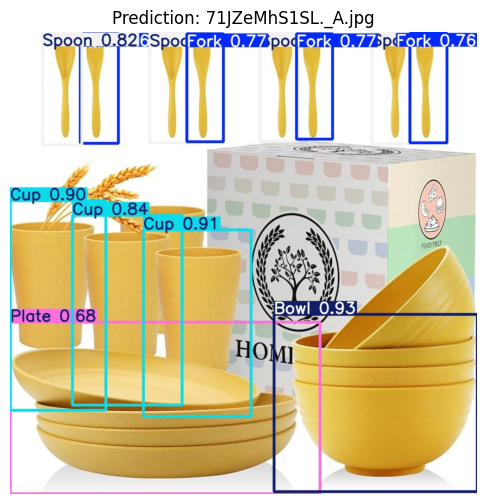

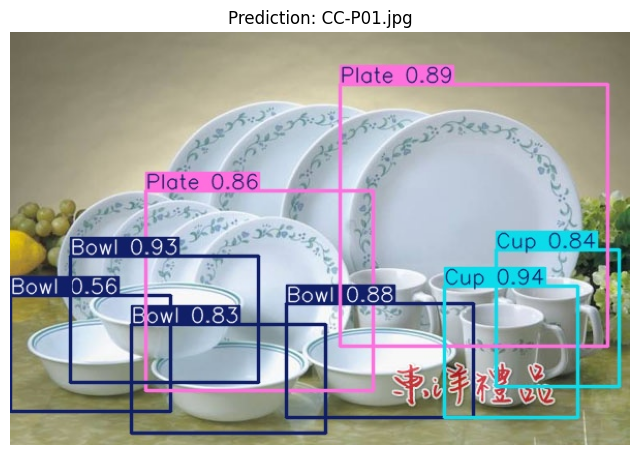

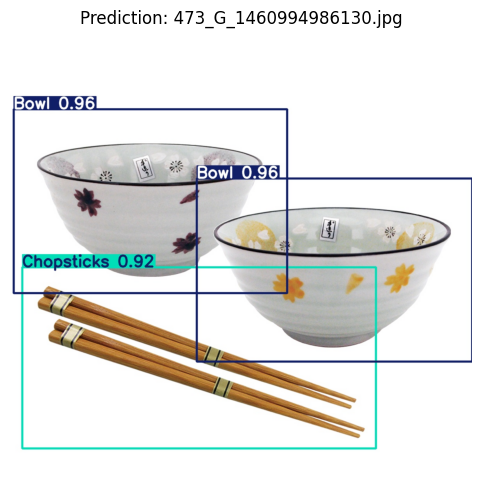

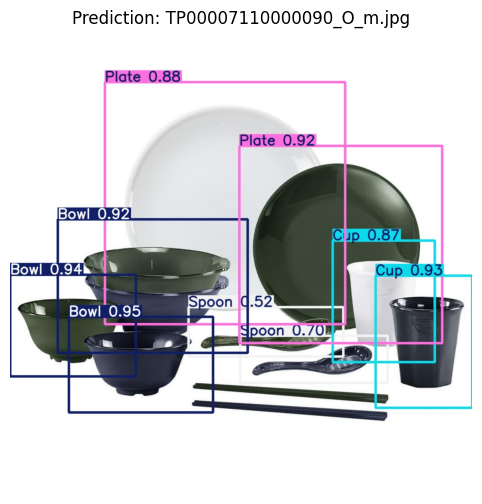

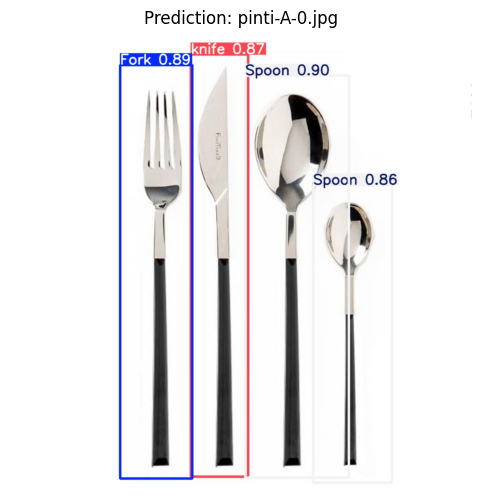

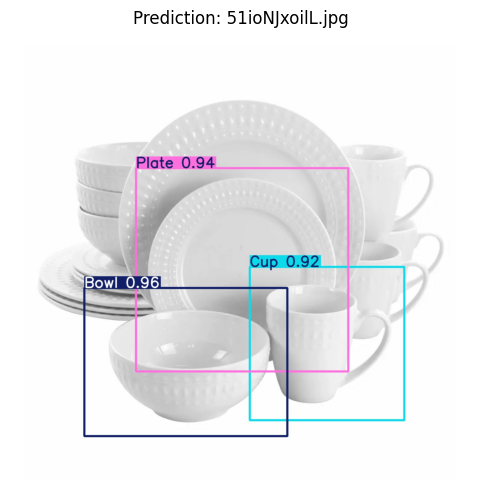

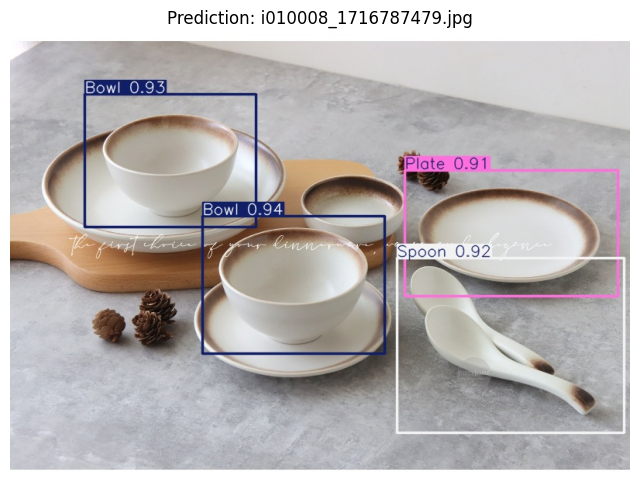

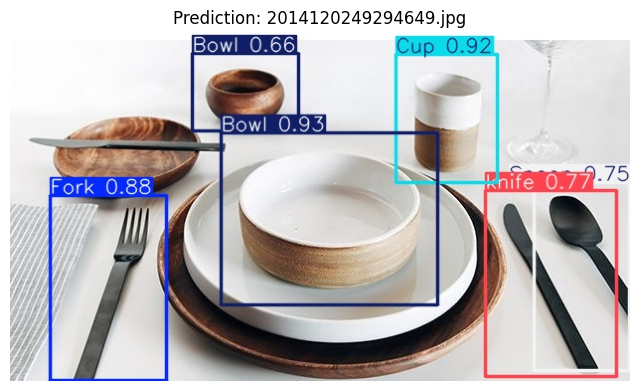

In [4]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ✅ 載入已訓練的模型
model = YOLO("/content/mAP86_best.pt")

# ✅ 設定測試圖片資料夾
image_folder = "/content/test_images"
output_folder = "predictions/"  # 存放 YOLO 預測結果

# ✅ 確保輸出資料夾存在
os.makedirs(output_folder, exist_ok=True)

# ✅ 取得所有圖片檔案
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# ✅ 進行物件偵測
results = model.predict(
    source=[os.path.join(image_folder, img) for img in image_files],  # 批量預測多張圖片
    device="cuda" if torch.cuda.is_available() else "cpu",  # 自動選擇 GPU 或 CPU
    conf=0.5,  # 設定信心閾值
    save=True,  # ✅ 自動存儲帶有標註的結果圖
)

# ✅ 顯示結果圖片
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    result_img_path = os.path.join("runs/detect/predict", img_name)  # YOLO 預測結果存放位置

    # 讀取圖片並顯示
    img = cv2.imread(result_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {img_name}")
    plt.show()


In [5]:
import cv2
import torch
from ultralytics import YOLO

# ✅ 讀取模型
model = YOLO("/content/mAP86_best.pt")  # 已訓練 YOLO 模型

# ✅ 設定影片路徑
input_video = "/content/input.mp4"  # 影片
output_video = "output.mp4"  # 輸出影片

# ✅ 讀取影片
cap = cv2.VideoCapture(input_video)

# ✅ 取得影片的 FPS 和解析度
fps = int(cap.get(cv2.CAP_PROP_FPS))  # 每秒幀數
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 影片寬度
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 影片高度

# ✅ 設定影片編碼格式與輸出
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # 設定 MP4 格式
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# ✅ 逐幀處理影片
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break  # 影片讀取結束

    # ✅ 使用 YOLO 預測 (設定 conf=0.5 以過濾低信心度的偵測)
    results = model.predict(frame, device="cuda" if torch.cuda.is_available() else "cpu", conf=0.5)

    # ✅ 取得 YOLO 標註結果
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # 取得座標
            cls = int(box.cls[0])  # 類別索引
            conf = box.conf[0].item()  # 信心度
            label = f"{model.names[cls]} {conf:.2f}"  # 物件標籤

            # ✅ 繪製標註框與文字
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 畫框
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # 顯示標籤

    # ✅ 寫入輸出影片
    out.write(frame)

# ✅ 釋放影片資源
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"🎬 預測完成，輸出影片已儲存為: {output_video}")


串流輸出內容已截斷至最後 5000 行。
Speed: 3.7ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 14.4ms
Speed: 2.8ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 13.0ms
Speed: 3.4ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 10.5ms
Speed: 3.3ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 10.9ms
Speed: 3.2ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 knife, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384